In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from scipy import stats

In [2]:
df=pd.read_csv("../data/spec_in_norm.csv")
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['funnel_100']=df['funnel_01']+df['funnel_10']


In [3]:
df.describe()


,유저_번호,고유_일자,첫_로그_일자,마지막_로그_일자,앱_실행,조회_전환_시간,방문일자비율,앱실행비율,세션당_한도조회_시작하기_버튼_클릭,세션당_한도조회_인트로_페이지_조회,...,GUV,VU,funnel_01,funnel_10,funnel_21,funnel_32,funnel_10_hesitate_mean,funnel_21_hesitate_sec_mean,funnel_32_hesitate_sec_mean,funnel_100
count,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,...,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000,159963.000000
mean,440029.202566,0.084345,0.719875,0.222863,0.040416,0.112909,0.126466,0.074867,0.097194,0.101359,...,0.045989,0.032585,0.179854,0.151422,0.128564,0.218578,0.599589,0.432496,0.180757,0.331276
std,253780.019505,0.088258,0.275285,0.237518,0.047450,0.230878,0.125303,0.088212,0.067879,0.066913,...,0.088543,0.087571,0.154864,0.145404,0.141017,0.153302,0.277232,0.242295,0.209154,0.277477
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,220789.500000,0.027027,0.538462,0.043956,0.008772,0.000000,0.048493,0.023588,0.048790,0.057221,...,0.000000,0.000000,0.091750,0.000000,0.000000,0.082277,0.500000,0.385662,0.089910,0.096572
50%,439928.000000,0.054054,0.824176,0.131868,0.026316,0.000000,0.090059,0.048079,0.092925,0.088575,...,0.000000,0.000000,0.162917,0.096572,0.107121,0.198240,0.500000,0.448419,0.131369,0.259490
75%,660033.000000,0.108108,0.956044,0.329670,0.052632,0.101010,0.161454,0.092562,0.133218,0.139761,...,0.000000,0.000000,0.270228,0.232684,0.190211,0.314203,1.000000,0.525551,0.189810,0.480554
max,879693.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.950066


In [4]:
df.isnull().sum()

유저_번호                          0
고유_일자                          0
첫_로그_일자                        0
마지막_로그_일자                      0
앱_실행                           0
조회_전환_시간                       0
방문일자비율                         0
앱실행비율                          0
세션당_한도조회_시작하기_버튼_클릭            0
세션당_한도조회_인트로_페이지_조회            0
세션당_한도조회_결과_확인                 0
세션당_대출관리_서비스_이용                0
세션당_로그인                        0
세션당_본인인증완료                     0
세션당_KCB_신용정보_조회                0
전체_이벤트                         0
신청서_갯수                         0
신청_갯수                          0
R                              0
F                              0
M                              0
세션당_여윳돈+DSR_계산기_서비스_이용         0
대출희망금액                         0
기대출수                           0
기대출금액                          0
신용점수등급                         0
연소득분위                          0
입사개월                           0
나이                             0
유저_성별                          0
대출_목적_0   

In [5]:
df.columns

Index(['유저_번호', '고유_일자', '첫_로그_일자', '마지막_로그_일자', '앱_실행', '조회_전환_시간', '방문일자비율',
       '앱실행비율', '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회', '세션당_한도조회_결과_확인',
       '세션당_대출관리_서비스_이용', '세션당_로그인', '세션당_본인인증완료', '세션당_KCB_신용정보_조회', '전체_이벤트',
       '신청서_갯수', '신청_갯수', 'R', 'F', 'M', '세션당_여윳돈+DSR_계산기_서비스_이용', '대출희망금액',
       '기대출수', '기대출금액', '신용점수등급', '연소득분위', '입사개월', '나이', '유저_성별', '대출_목적_0',
       '대출_목적_1', '대출_목적_2', '대출_목적_3', '근로형태_0', '근로형태_1', '근로형태_2', '고용형태_0',
       '고용형태_1', '고용형태_2', '주거소유형태_0', '주거소유형태_1', '주거소유형태_2', 'UG', 'GU',
       'GV', 'UV', 'VG', 'UGV', 'GUV', 'VU', 'funnel_01', 'funnel_10',
       'funnel_21', 'funnel_32', 'funnel_10_hesitate_mean',
       'funnel_21_hesitate_sec_mean', 'funnel_32_hesitate_sec_mean',
       'funnel_100'],
      dtype='object')

In [10]:
def iqr(data):
    q1, q3=np.percentile(data, [25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))


In [11]:
def z_score(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    z_scores=[(y-mean)/std for y in data]
    
    return np.where(np.abs(z_scores)>threshold)

In [12]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [13]:
df=clean_dataset(df)
df_na=df.dropna()
df_na.reset_index(inplace=True, drop=True)
df_na

,유저_번호,고유_일자,첫_로그_일자,마지막_로그_일자,앱_실행,조회_전환_시간,방문일자비율,앱실행비율,세션당_한도조회_시작하기_버튼_클릭,세션당_한도조회_인트로_페이지_조회,...,GUV,VU,funnel_01,funnel_10,funnel_21,funnel_32,funnel_10_hesitate_mean,funnel_21_hesitate_sec_mean,funnel_32_hesitate_sec_mean,funnel_100
0,11.0,0.013514,0.747253,0.450549,0.008772,0.000000,0.021118,0.015622,0.092925,0.139761,...,0.155855,0.000000,0.000000,0.232684,0.258100,0.242327,0.5,0.453293,0.157343,0.232684
1,12.0,0.121622,0.857143,0.131868,0.043860,0.000000,0.132757,0.060551,0.133218,0.139761,...,0.000000,0.000000,0.491293,0.284431,0.258100,0.496095,0.5,0.409407,0.159341,0.775723
2,17.0,0.013514,0.945055,0.934066,0.008772,0.000000,0.014141,0.011330,0.204601,0.139761,...,0.000000,0.000000,0.000000,0.171480,0.107121,0.082277,1.0,0.392812,0.199800,0.171480
3,24.0,0.013514,0.197802,0.164835,0.000000,0.030303,0.108671,0.019978,0.133218,0.139761,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.477743,0.558941,0.000000
4,25.0,0.013514,0.846154,0.021978,0.008772,0.000000,0.017229,0.013230,0.048790,0.051186,...,0.155855,0.000000,0.162917,0.096572,0.107121,0.198240,0.5,0.440819,0.162837,0.259490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159958,879683.0,0.162162,1.000000,0.087912,0.087719,0.000000,0.149294,0.101104,0.042127,0.064872,...,0.155855,0.348368,0.162917,0.284431,0.107121,0.280517,1.0,0.000000,0.000000,0.447348
159959,879689.0,0.067568,0.615385,0.076923,0.030702,0.000000,0.108671,0.061064,0.133218,0.183296,...,0.155855,0.196191,0.221065,0.232684,0.190211,0.242327,1.0,0.554874,1.000000,0.453748
159960,879691.0,0.067568,1.000000,0.857143,0.061404,0.000000,0.062977,0.071506,0.133218,0.060806,...,0.000000,0.000000,0.221065,0.232684,0.258100,0.242327,0.5,0.473565,0.159341,0.453748
159961,879692.0,0.040541,0.472527,0.395604,0.017544,0.000000,0.092360,0.048674,0.133218,0.163464,...,0.276746,0.000000,0.091750,0.096572,0.107121,0.198240,1.0,0.497144,0.143856,0.188323


In [15]:
X=df_na.drop(['유저_번호'], axis=1)

Text(0.5, 1.0, 'Iris feature correlation matrix')

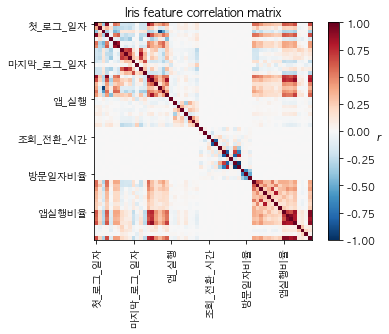

In [16]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)
# ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(X.columns), rotation=90)
# ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(X.columns))


plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")



In [17]:
X.columns, len((X.columns))

(Index(['고유_일자', '첫_로그_일자', '마지막_로그_일자', '앱_실행', '조회_전환_시간', '방문일자비율', '앱실행비율',
        '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회', '세션당_한도조회_결과_확인',
        '세션당_대출관리_서비스_이용', '세션당_로그인', '세션당_본인인증완료', '세션당_KCB_신용정보_조회', '전체_이벤트',
        '신청서_갯수', '신청_갯수', 'R', 'F', 'M', '세션당_여윳돈+DSR_계산기_서비스_이용', '대출희망금액',
        '기대출수', '기대출금액', '신용점수등급', '연소득분위', '입사개월', '나이', '유저_성별', '대출_목적_0',
        '대출_목적_1', '대출_목적_2', '대출_목적_3', '근로형태_0', '근로형태_1', '근로형태_2', '고용형태_0',
        '고용형태_1', '고용형태_2', '주거소유형태_0', '주거소유형태_1', '주거소유형태_2', 'UG', 'GU',
        'GV', 'UV', 'VG', 'UGV', 'GUV', 'VU', 'funnel_01', 'funnel_10',
        'funnel_21', 'funnel_32', 'funnel_10_hesitate_mean',
        'funnel_21_hesitate_sec_mean', 'funnel_32_hesitate_sec_mean',
        'funnel_100'],
       dtype='object'),
 58)

In [18]:
corr_df = X.corr(method='pearson')
corr_cols=corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j])>0.8 and i!=j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])


('고유_일자', '전체_이벤트') 0.8721697540129422
('고유_일자', '앱_실행') 0.9128757678217476
('마지막_로그_일자', 'R') -0.9239253785081584
('앱_실행', '전체_이벤트') 0.9329960626149097
('방문일자비율', '앱실행비율') 0.8632098772139459
('세션당_한도조회_인트로_페이지_조회', '세션당_본인인증완료') 0.8280997825357589
('신청서_갯수', 'funnel_100') 0.8021206198127109
('신청서_갯수', 'funnel_32') 0.8804857766390061
('신청서_갯수', 'M') 0.8314338979061057
('대출_목적_2', '대출_목적_3') -0.8391420515521989
('근로형태_1', '근로형태_2') -0.8258882522781812
('근로형태_2', '고용형태_1') -0.8198336007291191
('고용형태_1', '고용형태_2') -0.9665860009773606
('UV', 'GUV') 0.805051907440841
('funnel_01', 'funnel_100') 0.9289242237218909
('funnel_01', 'funnel_32') 0.847232303613954
('funnel_10', 'funnel_100') 0.9189561851611352
('funnel_10', 'funnel_32') 0.8006325299903753
('funnel_10', 'funnel_21') 0.915846698257939
('funnel_21', 'funnel_100') 0.8339569394672048
('funnel_21', 'funnel_32') 0.810193873903446
('funnel_32', 'funnel_100') 0.892402291918315


- [고유_일자] 살리고 [전체_이벤트, 앱_실행] 드랍
- [R] 살리고 [마지막_로그_일자] 드랍
- [앱실행비율] 살리고 [방문일자비율] 드랍
- [M] 살리고 [신청서_갯수] 드랍
- [funnel_100] 살리고 [funnel_01, funnel_10, funnel_32, funnel_21] 죽이기
- [세션당_한도조회_인트로_페이지_조회] 살리고 [세션당_본인인증완료]
- [근로형태_2] 살리고 [고용형태_2]
- [UV] 살리고 [GUV] 죽이기
- [대출_목적_2] / [대출_목적_3]
- [근로형태_2] / [고용형태_1, 근로형태_1, 고용형태_2]


In [19]:
drop_cols=['전체_이벤트', '앱_실행','신청서_갯수','앱실행비율', 'funnel_01', 'funnel_10', 'funnel_32', 'funnel_21', 
           '세션당_본인인증완료','고용형태_2', 'GUV', '마지막_로그_일자', '대출_목적_3', '고용형태_1', '근로형태_1', '고용형태_2']
X_corred=X.drop(drop_cols, axis=1)
len(X_corred.columns)

43

In [20]:
corr_df = X_corred.corr(method='pearson')
corr_cols = corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j]) > 0.7 and i != j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])

('세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_결과_확인') 0.7278374646798851
('GV', 'UGV') 0.7147177048866


Text(0.5, 1.0, 'Iris feature correlation matrix')

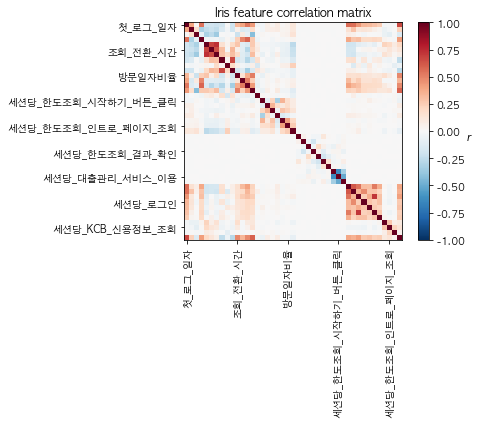

In [21]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X_corred.T), cmap="RdBu_r", vmin=-1, vmax=1)

# ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(X_corred.columns), rotation=90)
# ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(X_corred.columns))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")


### 군집 조건 분할


In [22]:
X_corred.columns

Index(['고유_일자', '첫_로그_일자', '조회_전환_시간', '방문일자비율', '세션당_한도조회_시작하기_버튼_클릭',
       '세션당_한도조회_인트로_페이지_조회', '세션당_한도조회_결과_확인', '세션당_대출관리_서비스_이용', '세션당_로그인',
       '세션당_KCB_신용정보_조회', '신청_갯수', 'R', 'F', 'M', '세션당_여윳돈+DSR_계산기_서비스_이용',
       '대출희망금액', '기대출수', '기대출금액', '신용점수등급', '연소득분위', '입사개월', '나이', '유저_성별',
       '대출_목적_0', '대출_목적_1', '대출_목적_2', '근로형태_0', '근로형태_2', '고용형태_0',
       '주거소유형태_0', '주거소유형태_1', '주거소유형태_2', 'UG', 'GU', 'GV', 'UV', 'VG', 'UGV',
       'VU', 'funnel_10_hesitate_mean', 'funnel_21_hesitate_sec_mean',
       'funnel_32_hesitate_sec_mean', 'funnel_100'],
      dtype='object')

In [23]:
X_spec = X_corred[['대출희망금액', '기대출수', '기대출금액', '신용점수등급', '연소득분위', '입사개월', '나이', '유저_성별',
                   '대출_목적_0', '대출_목적_1', '대출_목적_2', '근로형태_0', '근로형태_2', '고용형태_0',
                   '주거소유형태_0', '주거소유형태_1', '주거소유형태_2']]

X_log = X_corred[['고유_일자', '첫_로그_일자', '조회_전환_시간', '방문일자비율', '세션당_한도조회_시작하기_버튼_클릭',
       '세션당_한도조회_인트로_페이지_조회', '세션당_한도조회_결과_확인', '세션당_대출관리_서비스_이용', '세션당_로그인',
       '세션당_KCB_신용정보_조회', '신청_갯수', 'R', 'F', 'M', '세션당_여윳돈+DSR_계산기_서비스_이용']]

X_route = X_corred[['UG', 'GU', 'GV', 'UV', 'VG', 'UGV',
       'VU', 'funnel_10_hesitate_mean',
       'funnel_21_hesitate_sec_mean', 'funnel_32_hesitate_sec_mean',
       'funnel_100']]


In [50]:
X_log_route = X_corred[['고유_일자', '첫_로그_일자', '조회_전환_시간', '방문일자비율', '세션당_한도조회_시작하기_버튼_클릭',
       '세션당_한도조회_인트로_페이지_조회', '세션당_한도조회_결과_확인', '세션당_대출관리_서비스_이용', '세션당_로그인',
       '세션당_KCB_신용정보_조회', '신청_갯수', 'R', 'F', 'M', '세션당_여윳돈+DSR_계산기_서비스_이용',
       'UG', 'GU', 'GV', 'UV', 'VG', 'UGV',
       'VU', 'funnel_10_hesitate_mean',
       'funnel_21_hesitate_sec_mean', 'funnel_32_hesitate_sec_mean',
       'funnel_100']]

# PCA, Unrotated FA, Varimax FA

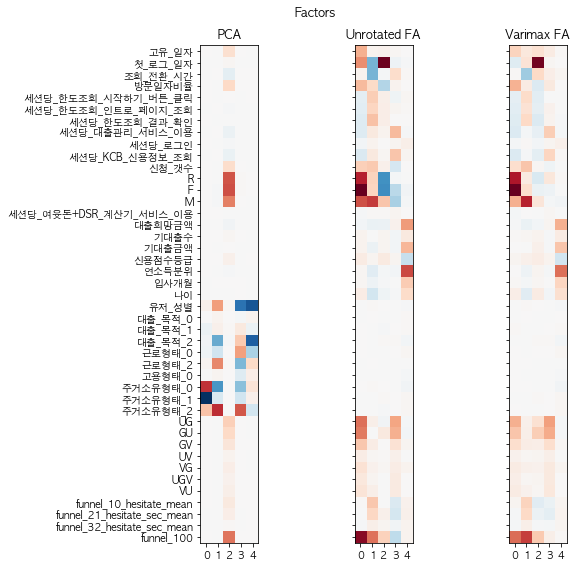

In [24]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

n_comps = 5

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X_corred)

    components = fa.components_.T
    # print("\n\n %s :\n" % method)
    # print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(X_corred.columns)))
    if ax.is_first_col():
        ax.set_yticklabels(X_corred.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([x for x in range(0, n_comps)])
    # ax.set_xticklabels([x for x in range(1, 15)])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()


## PCA

In [25]:
from sklearn.decomposition import PCA

max=0
num=0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_corred)
    principalDf = pd.DataFrame(data=printcipalComponents)
    if sum(pca.explained_variance_ratio_)>max: 
        max=sum(pca.explained_variance_ratio_)
        num=i
        if max>0.75: break
        
print(max, num, len(X_corred.columns))
X_cluster=principalDf.copy()

0.7750364294116944 11 43


In [26]:
from sklearn.decomposition import PCA

max = 0
num = 0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_spec)
    principalDf = pd.DataFrame(data=printcipalComponents)
    if sum(pca.explained_variance_ratio_) > max:
        max = sum(pca.explained_variance_ratio_)
        num = i
        if max > 0.75:
            break

print(max, num, len(X_spec.columns))


0.7852949136204863 6 17


In [27]:
from sklearn.decomposition import PCA

max = 0
num = 0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_log)
    principalDf = pd.DataFrame(data=printcipalComponents)
    if sum(pca.explained_variance_ratio_) > max:
        max = sum(pca.explained_variance_ratio_)
        num = i
        if max > 0.75:
            break

print(max, num, len(X_log.columns))


0.8383184660221117 4 15


In [28]:
from sklearn.decomposition import PCA

max = 0
num = 0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_route)
    principalDf = pd.DataFrame(data=printcipalComponents)
    if sum(pca.explained_variance_ratio_) > max:
        max = sum(pca.explained_variance_ratio_)
        num = i
        if max > 0.75:
            break

print(max, num, len(X_route.columns))


0.8011069811961021 4 11


In [51]:
from sklearn.decomposition import PCA

max = 0
num = 0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_log_route)
    principalDf = pd.DataFrame(data=printcipalComponents)
    if sum(pca.explained_variance_ratio_) > max:
        max = sum(pca.explained_variance_ratio_)
        num = i
        if max > 0.75:
            break

print(max, num, len(X_log_route.columns))



0.7500494177808193 6 26


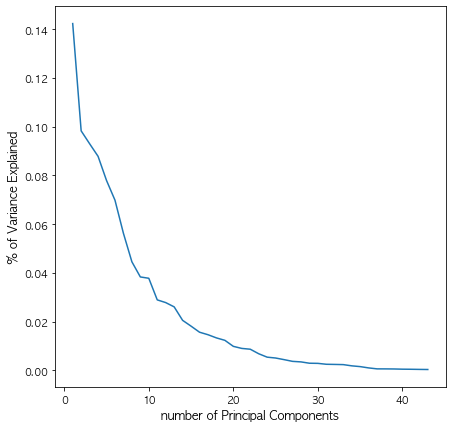

In [29]:
pca = PCA(random_state=0)
pca.fit_transform(X_corred)
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(range(1, X_corred.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel("number of Principal Components", fontsize=12)
plt.ylabel("% of Variance Explained", fontsize=12)
plt.show()


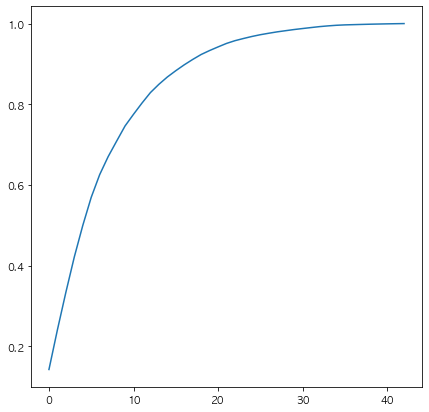

In [30]:
# PCA 주성분분석 차원 갯수  늘어날  때 마다의 설명력
pca = PCA(random_state=0)
X_p = pca.fit_transform(X_corred)

plt.plot(np.cumsum(pca.explained_variance_ratio_))


## Varimax

#### Varimax를 위한 검정

In [31]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import FactorAnalyzer

chi_square_value, p_value=calculate_bartlett_sphericity(X_corred)
chi_square_value, p_value

(2784100.441400732, 0.0)

In [181]:
kmo_all, kmo_model = calculate_kmo(X_corred)  
kmo_model


0.6970842831041011

In [182]:
kmo_all, kmo_model = calculate_kmo(X_log) 
kmo_model


0.6843246301315038

In [183]:
kmo_all, kmo_model = calculate_kmo(X_route)
kmo_model


0.753071013504058

In [32]:
kmo_all, kmo_model=calculate_kmo(X_spec)
kmo_model

0.34738804587789834

In [33]:
# Unrotated FA
fa=FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(X_corred)
ev, v=fa.get_eigenvalues()
ev

array([5.37996029e+00, 3.46793075e+00, 2.45893004e+00, 2.03354195e+00,
       1.70068984e+00, 1.68056327e+00, 1.45335988e+00, 1.42336279e+00,
       1.35670743e+00, 1.34826860e+00, 1.25206739e+00, 1.13173717e+00,
       1.11090744e+00, 1.09601845e+00, 9.80902926e-01, 9.57509313e-01,
       9.55357997e-01, 8.85870519e-01, 8.81506669e-01, 8.53708874e-01,
       8.37380889e-01, 7.91680909e-01, 7.57813495e-01, 7.25242249e-01,
       7.02234722e-01, 6.84754445e-01, 6.63030807e-01, 5.94860443e-01,
       5.75123818e-01, 5.44538069e-01, 5.27734214e-01, 5.11217465e-01,
       4.17600818e-01, 3.58890073e-01, 3.27007418e-01, 2.91007621e-01,
       2.73459036e-01, 2.55521093e-01, 2.34734831e-01, 2.07565537e-01,
       1.77263187e-01, 1.28331296e-01, 4.10599624e-03])

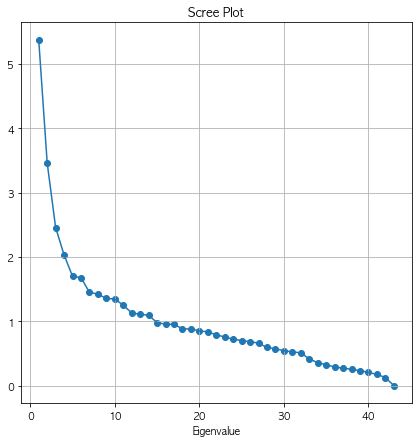

In [34]:
plt.scatter(range(1, X_corred.shape[1]+1), ev)
plt.plot(range(1, X_corred.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Eigenvalue')
plt.grid()
plt.show() # X_corred 5개, X_log 3개, X_route 2개

In [35]:
# Varimax FA
fa=FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(X_corred)
efa_result=pd.DataFrame(fa.loadings_, index=X_corred.columns)
efa_result

,0,1,2,3,4
고유_일자,0.752628,-0.006228,-0.359235,0.017559,-0.007032
첫_로그_일자,0.161819,-0.201002,-0.167739,0.008516,-0.015474
조회_전환_시간,-0.021044,-0.469294,-0.014695,0.006820,-0.008824
방문일자비율,0.519041,0.145409,-0.202624,0.009049,0.008119
세션당_한도조회_시작하기_버튼_클릭,-0.116902,0.794570,0.290745,-0.017758,0.012302
세션당_한도조회_인트로_페이지_조회,-0.045860,0.606889,0.473418,-0.012004,0.004693
세션당_한도조회_결과_확인,-0.092511,0.724859,0.417776,-0.018314,0.009041
세션당_대출관리_서비스_이용,0.093972,-0.043672,0.759619,0.000011,-0.009062
세션당_로그인,-0.003058,0.033417,0.072940,-0.003099,-0.002957
세션당_KCB_신용정보_조회,0.028301,-0.009503,0.745129,-0.002404,-0.006929


<AxesSubplot:>

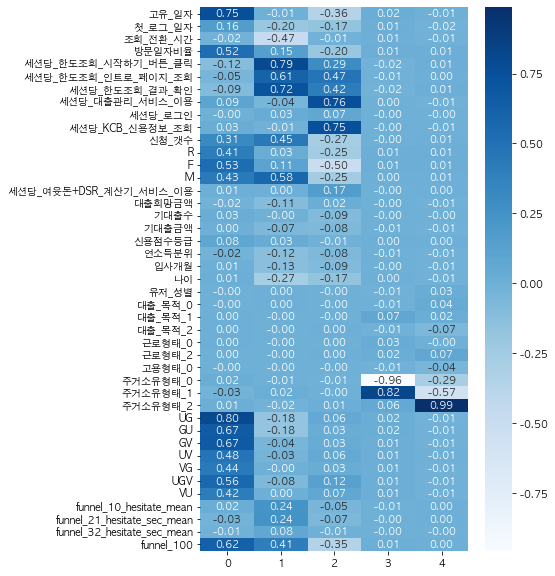

In [36]:
plt.figure(figsize=(6, 10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [37]:
fa=FactorAnalyzer(n_factors=23, rotation="varimax")
fa.fit(X_corred) # 최대우도
fa.get_factor_variance()
df1=pd.DataFrame(fa.get_factor_variance())
df1.index=['SS Loadings', 'Proportion Var', 'Cumulative Var']
df1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
SS Loadings,3.031464,2.469843,1.913448,1.675339,1.591627,1.481266,1.394413,1.125715,1.063271,1.032572,...,0.898336,0.847342,0.821120,0.761132,0.659197,0.546735,0.438958,0.427934,0.285351,0.202609
Proportion Var,0.070499,0.057438,0.044499,0.038961,0.037015,0.034448,0.032428,0.026179,0.024727,0.024013,...,0.020892,0.019706,0.019096,0.017701,0.015330,0.012715,0.010208,0.009952,0.006636,0.004712
Cumulative Var,0.070499,0.127937,0.172436,0.211398,0.248412,0.282860,0.315288,0.341468,0.366195,0.390208,...,0.480644,0.500350,0.519446,0.537146,0.552477,0.565191,0.575400,0.585352,0.591988,0.596700


In [38]:
FAdf=pd.DataFrame(fa.fit_transform(X_corred))
FAdf

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.855258,0.041121,-0.692406,2.584546,-0.147036,0.237685,1.849787,0.569975,0.108557,-0.117921,...,0.446926,-0.717774,0.223008,0.478311,0.799453,0.326802,-0.233848,0.375140,0.306797,0.508233
1,0.508296,1.241405,0.040706,-0.979592,-0.881267,0.719327,-0.541695,0.318699,-0.279485,-0.100880,...,-0.698813,0.111833,-0.013594,-1.392152,-0.279232,-0.309968,-0.506696,-0.378711,0.188218,0.750384
2,-1.585142,0.946992,0.845781,-0.605222,-0.888128,0.538758,-0.586878,0.046408,0.032490,-0.177126,...,-0.623878,0.059757,0.049673,0.408235,-0.338254,0.682507,-0.292714,0.029779,-0.371431,-0.078671
3,0.143537,0.416199,-0.897858,2.634873,1.431012,-1.190004,-0.446890,0.557441,-0.082973,-0.186682,...,-0.998424,-0.026650,0.180402,0.506042,0.018810,0.064378,-0.334111,-0.390049,-0.100631,-0.611678
4,-0.742344,-0.137235,-0.609861,-0.189753,1.445344,0.157087,-0.397545,-1.038459,0.129094,-0.132573,...,-0.065954,0.609761,0.530496,-1.253128,-0.057275,-0.742036,-0.520052,0.024069,0.309739,1.142020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159958,-0.263298,-0.492187,2.474013,-0.401476,1.494928,0.384275,-0.413562,-0.440439,-1.459929,-0.099145,...,0.992108,0.135196,-0.042363,-1.476410,1.958739,0.774943,0.397042,-0.352614,-0.087853,-0.079163
159959,0.132007,0.351118,0.259643,-0.001452,-0.878804,-0.490492,-0.541333,0.795126,0.773784,-0.093729,...,1.631923,0.393816,-0.802739,-1.446962,0.527076,-0.163605,-0.505829,0.529797,1.038686,-0.324176
159960,-0.578805,-0.196734,-0.902324,-1.128197,1.415946,0.925789,-0.441135,1.123442,-0.031490,-0.220620,...,-0.352798,0.082256,-0.940568,0.729683,0.921704,1.176408,-0.530190,-0.227623,0.176510,-0.130057
159961,-0.309661,0.263057,-1.143866,0.890521,-0.838062,-0.712216,-0.623169,1.516331,0.045357,-0.122241,...,1.061631,-0.349097,1.230426,0.779673,0.745745,0.591884,0.701221,-1.504438,0.511709,-0.368944


- 요인 분석이 10개까지 가도 설명력이 0.38이라 소용이 없음
- 23개까지 가도 0.56

In [39]:
pca_list=[4, 4, 6]
for i in range(3):
    pca = PCA(n_components=pca_list[i])  # 주성분을 몇개로 할지 결정
    if i==0:
        printcipalComponents = pca.fit_transform(X_route)
        X_cluster_r = pd.DataFrame(data=printcipalComponents)
    elif i==1:
        printcipalComponents = pca.fit_transform(X_log)
        X_cluster_l = pd.DataFrame(data=printcipalComponents)
    else:
        printcipalComponents = pca.fit_transform(X_spec)
        X_cluster_s = pd.DataFrame(data=printcipalComponents)

In [52]:

pca = PCA(n_components=6)  # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X_log_route)
X_cluster_rl = pd.DataFrame(data=printcipalComponents)

# 군집화

In [56]:
import matplotlib as mpl
from sklearn.cluster import KMeans

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rc('axes', unicode_minus=False)  # 유니코드에서 음수 부호 설정
warnings.filterwarnings("ignore")


In [41]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette_kmeans(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster)+'\n'
                           'Silhouette Score :' + str(round(sil_avg, 3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


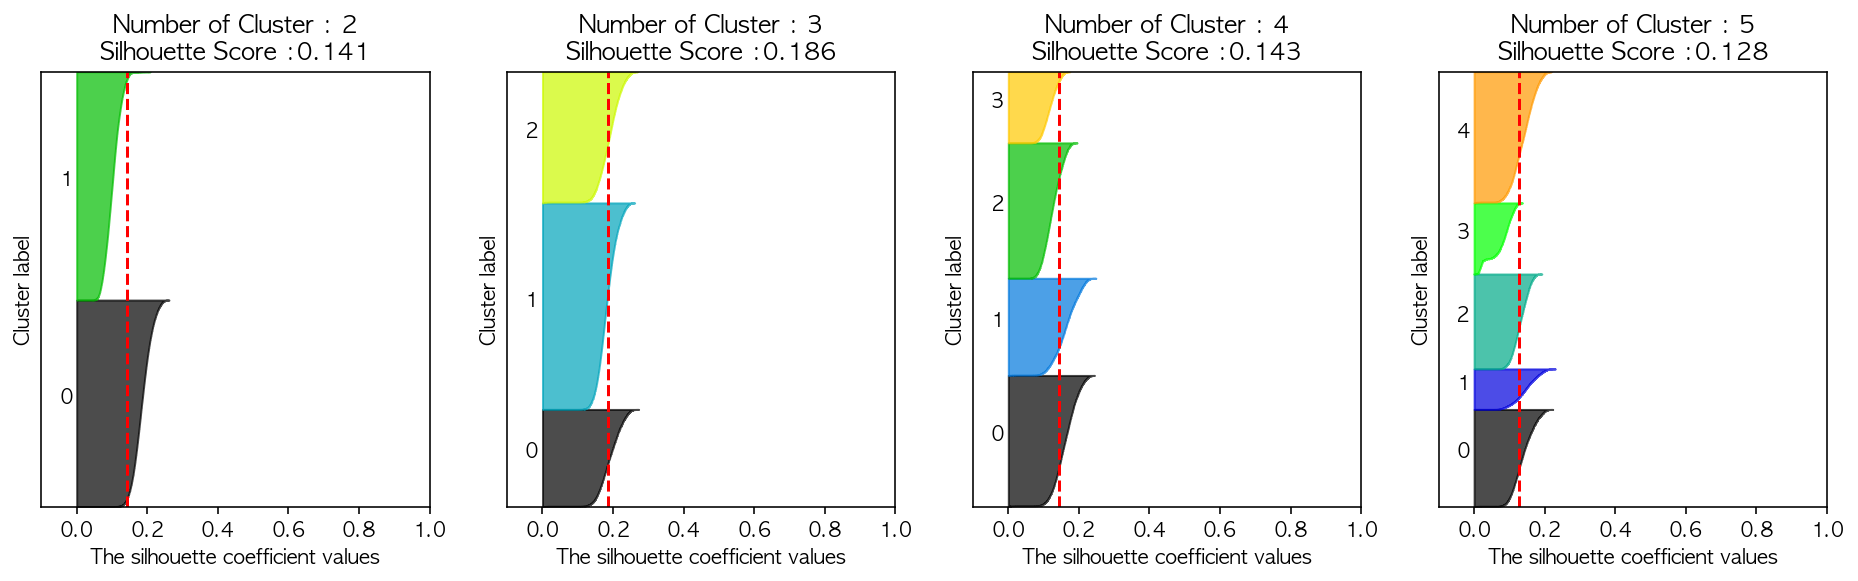

In [42]:
visualize_silhouette_kmeans([2, 3, 4, 5], X_corred) # 88분

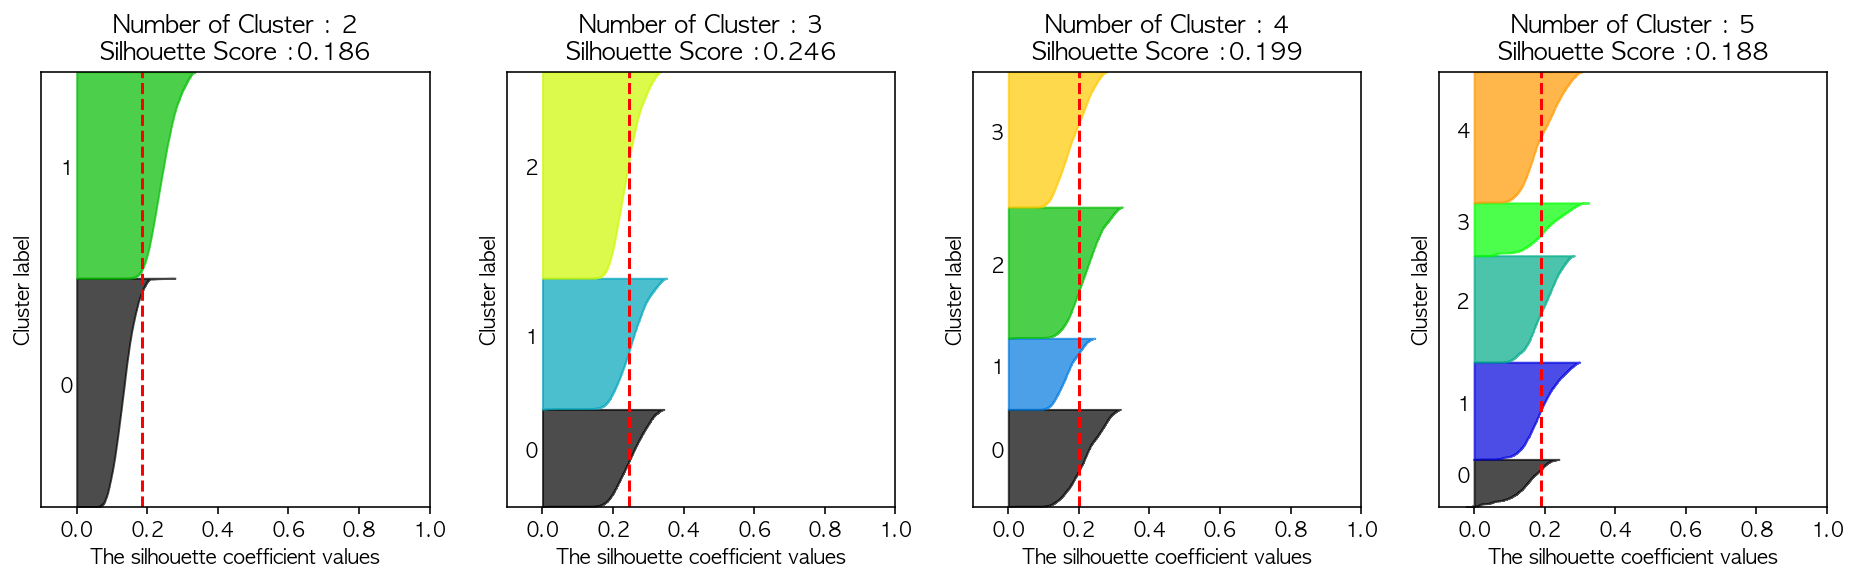

In [43]:
visualize_silhouette_kmeans([2, 3, 4, 5], X_cluster)

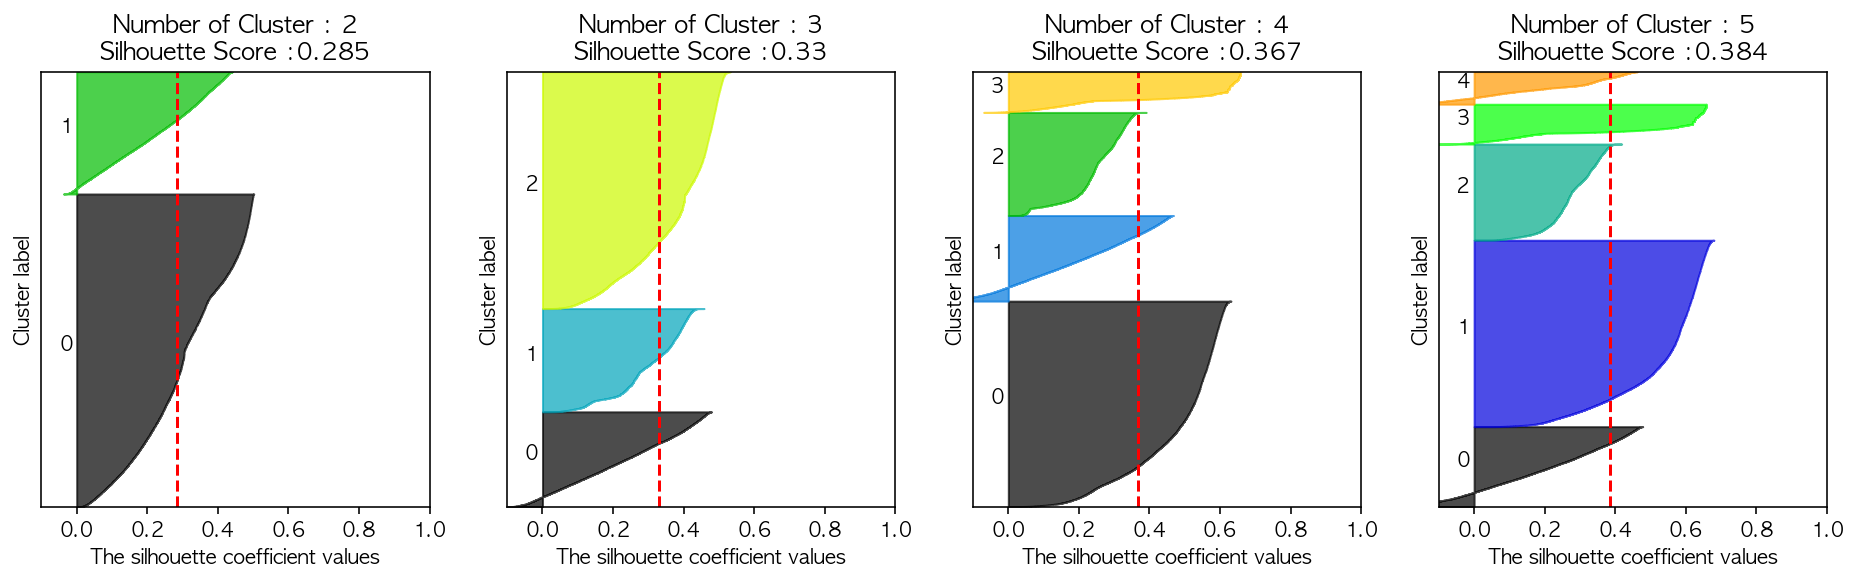

In [44]:
visualize_silhouette_kmeans([2, 3, 4, 5], X_cluster_r)  # 3

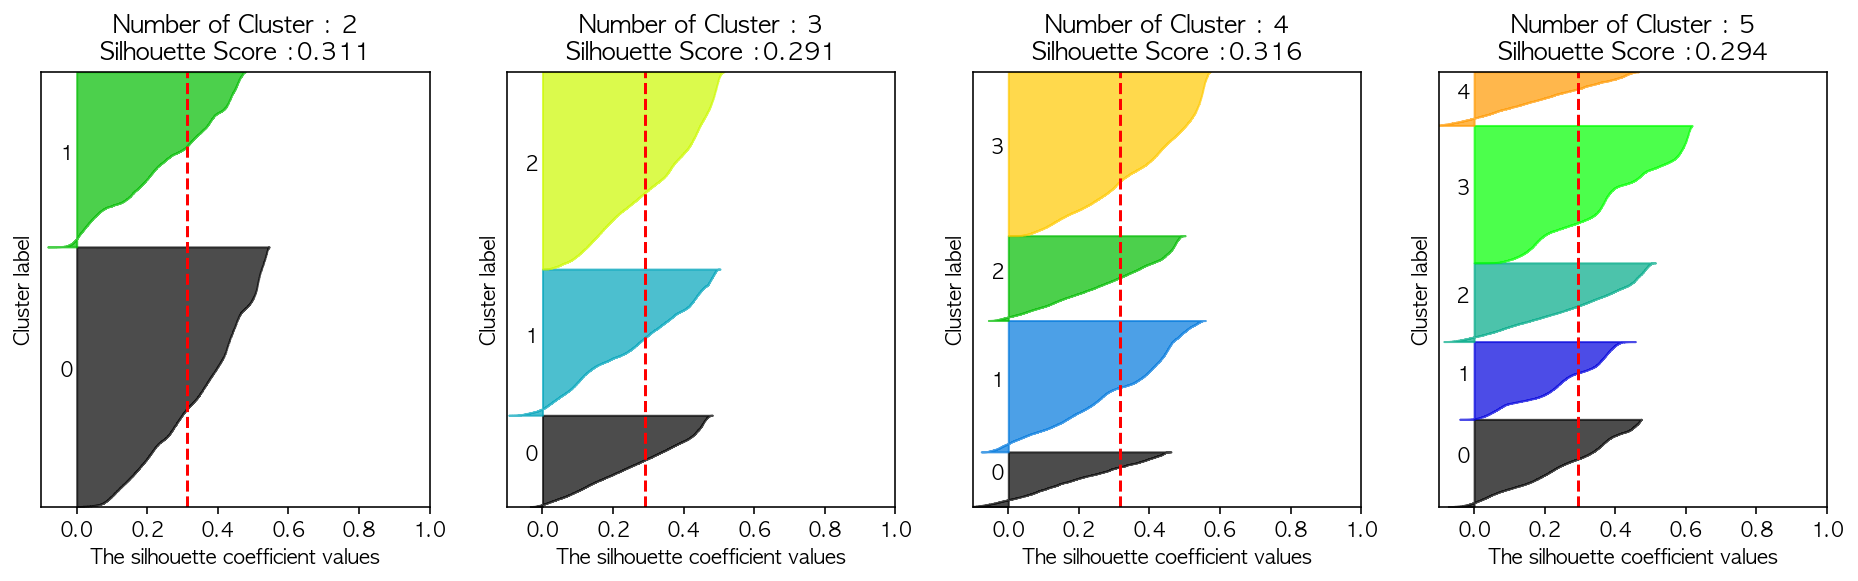

In [45]:
visualize_silhouette_kmeans([2, 3, 4, 5], X_cluster_l) # 2

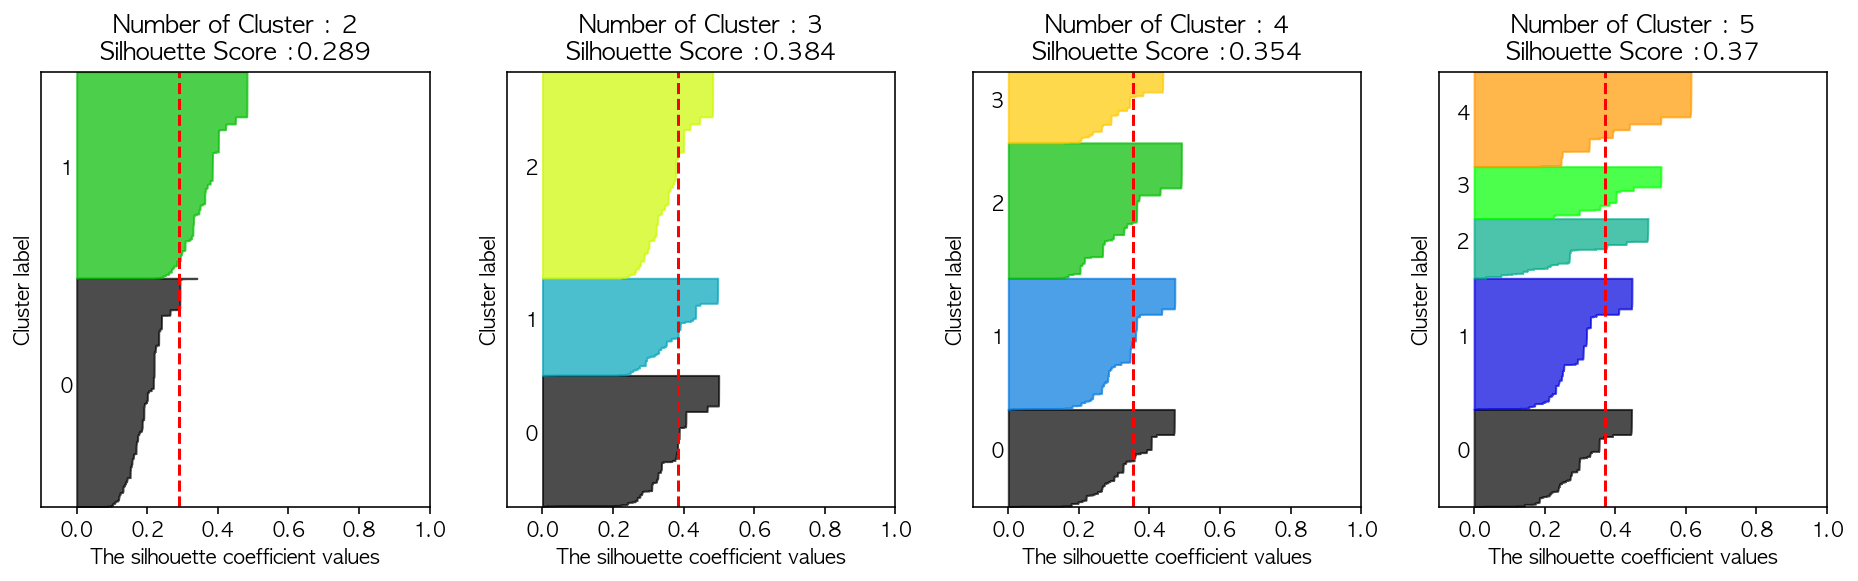

In [46]:
visualize_silhouette_kmeans([2, 3, 4, 5], X_cluster_s) # 3


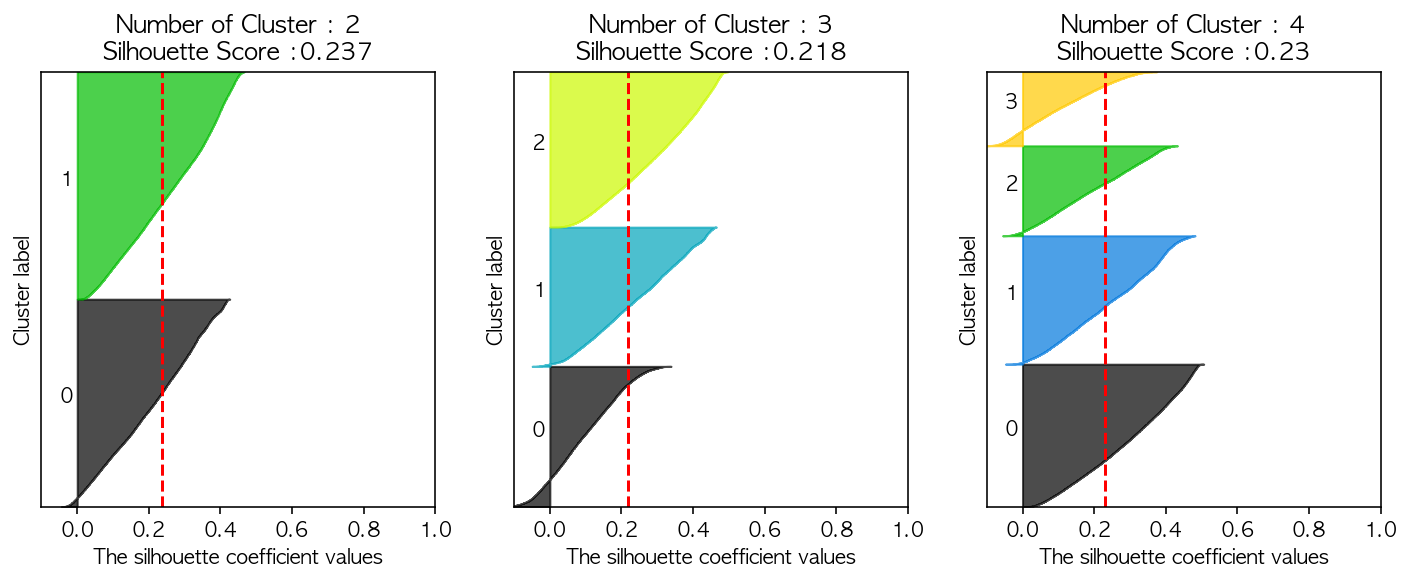

In [54]:
visualize_silhouette_kmeans([2, 3, 4], X_cluster_rl) # 2


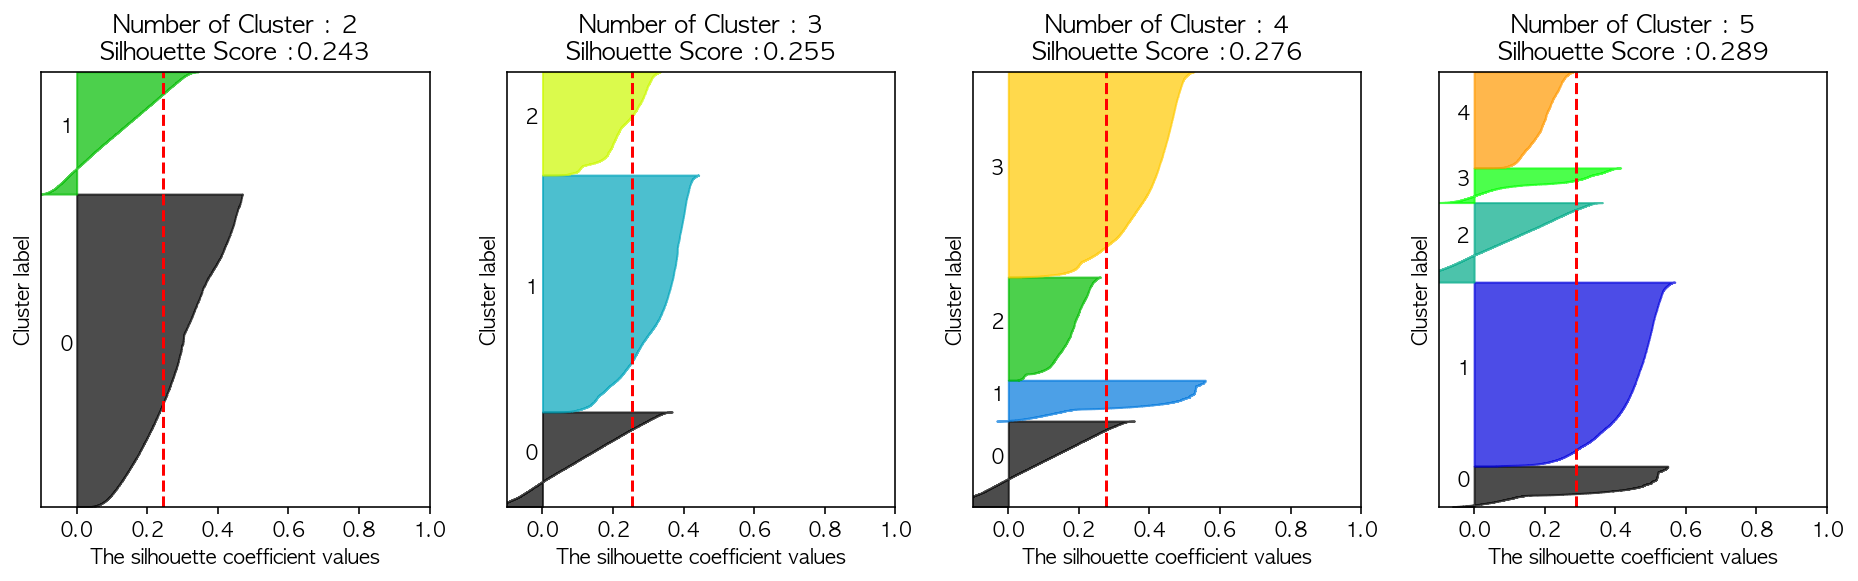

In [47]:
visualize_silhouette_kmeans([2, 3, 4, 5], X_route)


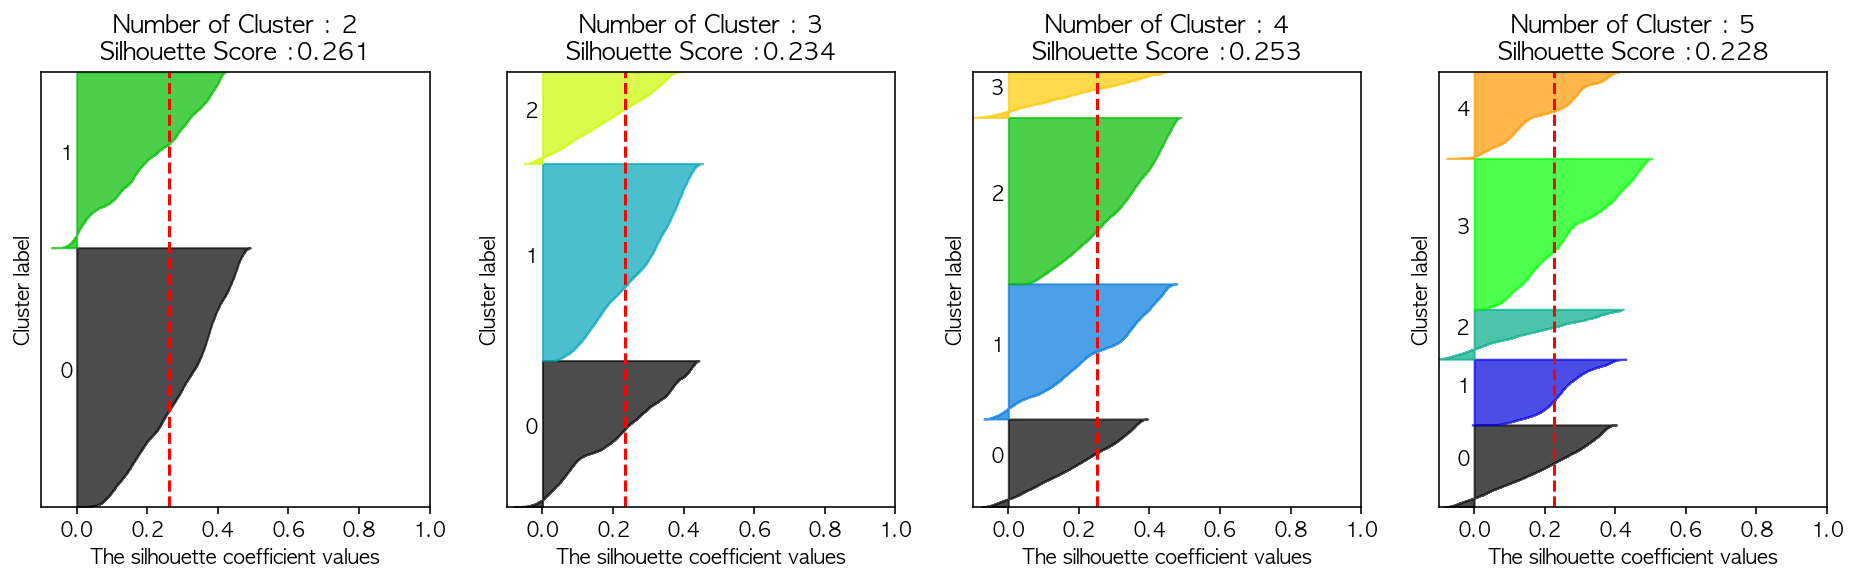

In [48]:
visualize_silhouette_kmeans([2, 3, 4, 5], X_log)


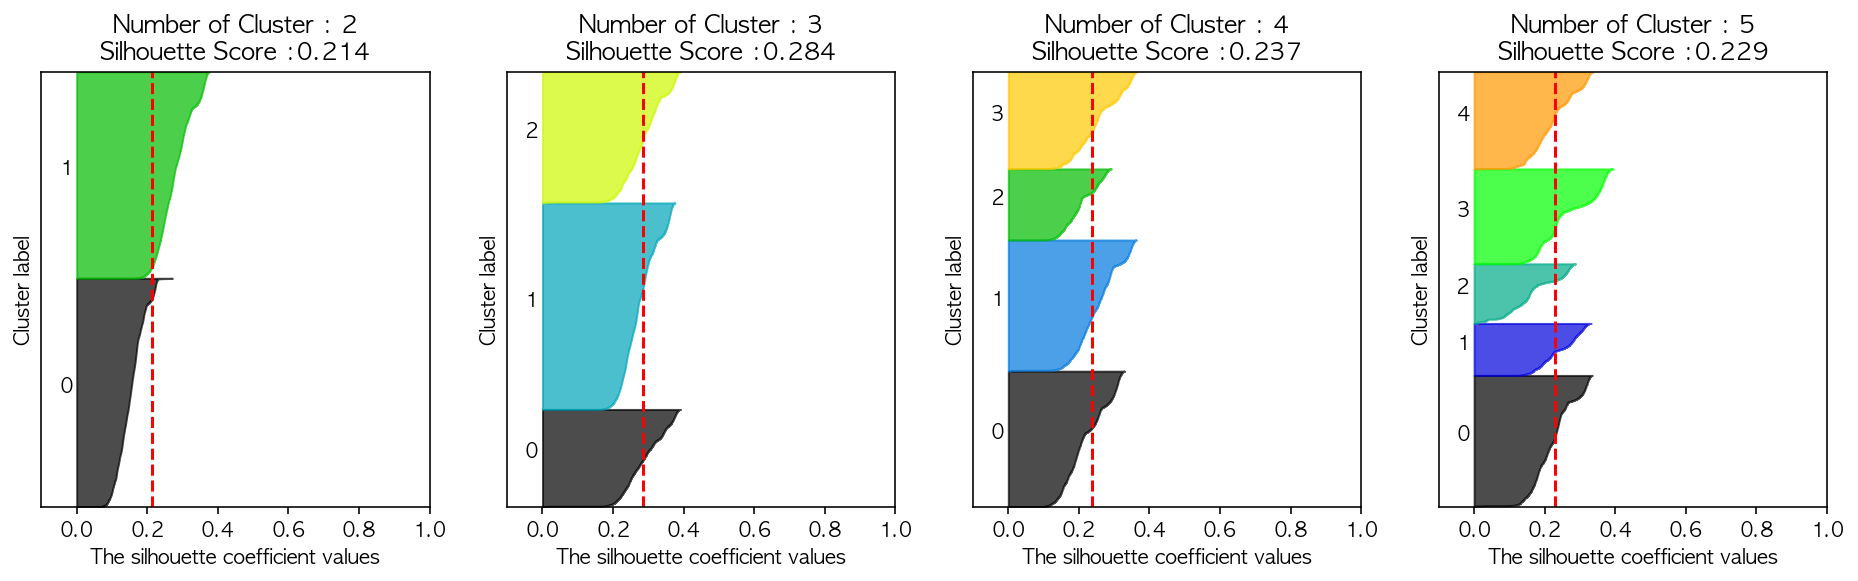

In [49]:
visualize_silhouette_kmeans([2, 3, 4, 5], X_spec)


In [180]:
df_na.to_csv("../data/df_na.csv", index=False)


In [176]:
X_cluster_l.to_csv("../data/X_cluster_l.csv", index=False)
X_cluster_r.to_csv("../data/X_cluster_r.csv", index=False)
X_cluster_s.to_csv("../data/X_cluster_s.csv", index=False)

In [178]:
X_spec.to_csv("../data/X_spec.csv", index=False)
X_log.to_csv("../data/X_log.csv", index=False)
X_route.to_csv("../data/X_route.csv", index=False)
X_corred.to_csv("../data/X_corred.csv", index=False)


---

# 병합 군집

# DBScan

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
import math

db = DBSCAN(eps=0.3, min_samples=10).fit(X_corred)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" %
      metrics.silhouette_score(X_corred, labels))


In [ ]:
# epsilon, 최소 샘플 개수 설정
X_cluster_dbscan_c = X_corred.copy()
X_cluster_dbscan_c['cluster'] = db.fit_predict(X_corred)

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, X_cluster_dbscan_c['cluster'].max() + 1):
    plt.scatter(X_cluster_dbscan_c.loc[X_cluster_dbscan_c['cluster'] == i, 'Annual Income (k$)'], X_cluster_dbscan_c.loc[X_cluster_dbscan_c['cluster'] == i, 'Spending Score (1-100)'],
                label='cluster ' + str(i))

plt.legend()


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
import math

db = DBSCAN(eps=0.3, min_samples=10).fit(X_cluster)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" %
      metrics.silhouette_score(X_cluster, labels))


In [ ]:
# epsilon, 최소 샘플 개수 설정
X_cluster_dbscan = X_cluster.copy()
X_cluster_dbscan['cluster'] = db.fit_predict(X_cluster)

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, X_cluster_dbscan['cluster'].max() + 1):
    plt.scatter(X_cluster_dbscan.loc[X_cluster_dbscan['cluster'] == i, 'Annual Income (k$)'], X_cluster_dbscan.loc[X_cluster_dbscan['cluster'] == i, 'Spending Score (1-100)'],
                label='cluster ' + str(i))

plt.legend()


In [254]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
import math

db = DBSCAN(eps=0.3, min_samples=10).fit(X_cluster_r)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" %
      metrics.silhouette_score(X_cluster_r, labels))


Estimated number of clusters: 219
Estimated number of noise points: 69090
Silhouette Coefficient: -0.269


In [ ]:
# epsilon, 최소 샘플 개수 설정
X_cluster_dbscan_2 = X_cluster_r.copy()
X_cluster_dbscan_2['cluster'] = db.fit_predict(X_cluster_r)

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, X_cluster_dbscan_2['cluster'].max() + 1):
    plt.scatter(X_cluster_dbscan_2.loc[X_cluster_dbscan_2['cluster'] == i, 'Annual Income (k$)'], X_cluster_dbscan_2.loc[X_cluster_dbscan_2['cluster'] == i, 'Spending Score (1-100)'],
                label='cluster ' + str(i))

plt.legend()


# 계층 군집

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_cluster, 'single')


In [ ]:
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()
